# A better body-wave analysis
Fred Massin [fmassin@mun.ca](fmassin@mun.ca)

- Body-wave recognition methods
- Better interoperability
- Better characteristic functions
- Better wavelet extraction
- Double couple analysis

# Body-wave recognition methods
## Existing work

**Table 1**: The body-wave recognition methods.
<img src="material/informed-uninformed.pdf" alt="Location" style="height: 200px;"/>


1. Several methods existing based on common pre-processor.
2. St/Lt$_a$ implemented in python (ObsPy.trigger) with trace iteration. 

## A better ObsPy.trigger module ?
**Table 1**: A class hierarchy for uninformed triggering algorithms

pre-processor|multiplexor|processor|post-processor
-:|:-:|:-:|-
RMS|LT-ST|Ratio|derivation
Average|RW-LW|Correlation|Kurtosis
|Components||
**attribute**|**method**|**class**|**class**

1. Enable combining and systematic test.
2. More precise and more sensitive characteristic functions.

In [143]:
%matplotlib notebook
from obspy import read

import sys
sys.path.append("/Users/massin/Documents/Projects/NaiNo-Kami/Py/NnK/NnK/")
import trigger

# Better interoperability
## Recursive operations
All classes of our trigger module rely on recursive operations, all calculated by the same function.
- enable rms, sum and average of (squared) signal (derivative),
- enable fast matrix array processing,
- enable mutli-scaling,
- allows easy extension.

In [144]:
help(trigger.recursive)

Help on function recursive in module trigger:

recursive(a, scales=None, operation=None, maxscale=None)
    _
    Performs multi-scale calculation by 
    creating series of operations of different subsets of 
    the full data set. This is also called rolling 
    operation.
    ______
    :type: 
            - ObsPy:class:`~obspy.core.stream`
            - scales: vector (optional).
            - operation: string (optional).
            - maxscale: int (optional).
    :param: 
            - data-stream of e.g. seismograms.
            - scales: scale(s) of time-series operation (in samples).
            - operation: type of operation:
                    rms: root mean square over time scales.
                    sum: sum over time scales.
                    average: average  over time scales.
                    sumabs: sum of absolute values over time scales.
                    averageabs: average of absolute values over time scales.
            - maxscale: maximum allowed scale

## Plotting and output
All classes can be used for plotting ...

<IPython.core.display.Javascript object>


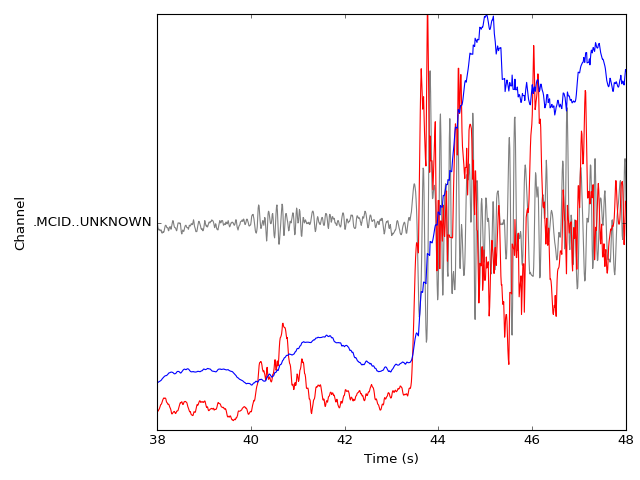

(38, 48)

In [145]:
st = read(pathname_or_url='/Users/massin/Documents/Data/WY/dtec/2010/01/20/20100120075440WY/*MCD*.sac.linux')
test = trigger.ShortLongTerms(data=st[0], preprocessor='averageabs', scales=[20, 160])
ax = test.plot()
ax.set_xlim([38,48])

as well as for further calculations.

In [146]:
myvar = test.output()[0]
print myvar[0].shape

(1, 1, 8758)


# Better characteristic functions
## One components methods
Comparisons are done changing one thing at a time.

**$\bar{ST}/\bar{LT}$ versus $\bar{LP}/\bar{RP}$**

In [147]:
a = read(pathname_or_url='/Users/massin/Documents/Data/WY/dtec/2010/01/20/20100120075440WY/*YHH*.sac.linux')

<IPython.core.display.Javascript object>


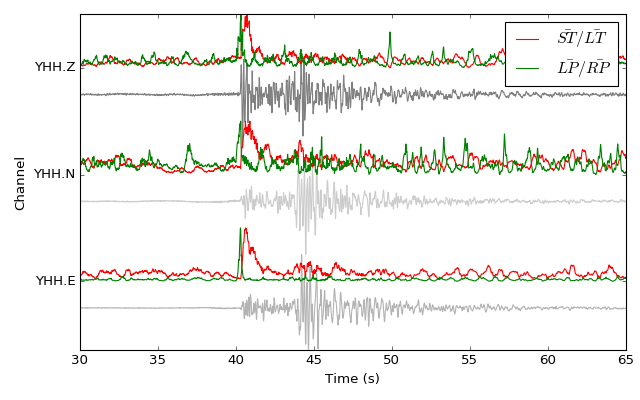

(30, 65)

In [148]:
cf0 = trigger.Ratio(data=a, multiplexor = 'stlt', preprocessor='averageabs', scales=[30, 240])
cf1 = trigger.Ratio(data=a, multiplexor = 'ltrt', preprocessor='averageabs', scales=[30])
ax, shift = cf0.plot(cfcolor='r', label=r'$\bar{ST}/\bar{LT}$')
ax, shift = cf1.plot(cfcolor='g', label=r'$\bar{LP}/\bar{RP}$', ax=ax, f="nodata")
ax.set_xlim([30,65])

- **+** $\bar{LP}/\bar{RP}$ has more precise peaks,
- **-** $\bar{LP}/\bar{RP}$ is more sensitive to data noise,
- **-** $\bar{LP}/\bar{RP}$ is not sensitive to S-wave.

**$ST/LT_{rms}$ versus $LP/RP_{rms}$**

<IPython.core.display.Javascript object>


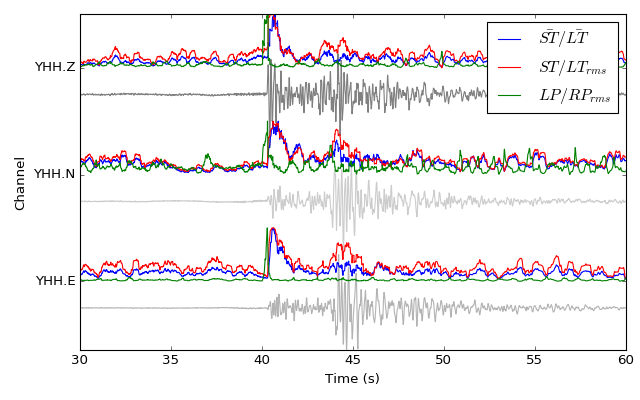

(30, 60)

In [149]:
cf2 = trigger.Ratio(data=a, multiplexor = 'stlt', preprocessor='rms', scales=[30, 240])
cf3 = trigger.Ratio(data=a, multiplexor = 'ltrt', preprocessor='rms', scales=[30])
ax, shift = cf0.plot(cfcolor='b', label=r'$\bar{ST}/\bar{LT}$')
ax, shift = cf2.plot(cfcolor='r', label=r'$ST/LT_{rms}$', ax=ax, f="nodata")
ax, shift = cf3.plot(cfcolor='g', label=r'$LP/RP_{rms}$', ax=ax, f="nodata")
ax.set_xlim([30,60])

- **+** $LP/RP_{rms}$ has more precise peaks.
- **-** $LP/RP_{rms}$ is still more sensitive to data noise but it gets better,
- **-** $LP/RP_{rms}$ is not sensitive to S-wave.

## Multi-components methods
$\star C_{rms}$ should only be compared with other methods based on correlation and rms.

**$ST\star LT_{rms}$ versus $\star C_{rms}$ **

<IPython.core.display.Javascript object>


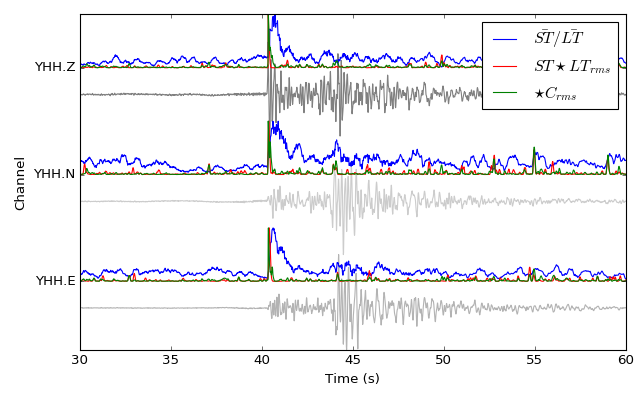

(30, 60)

In [150]:
cf4 = trigger.Correlate(data=a, multiplexor = 'stlt', preprocessor='rms', scales=[60,480])
cf5 = trigger.Correlate(data=a, multiplexor = 'comp', preprocessor='rms', scales=[60])
ax, shift = cf0.plot(cfcolor='b', label=r'$\bar{ST}/\bar{LT}$')
ax, shift = cf4.plot(cfcolor='r', label=r'$ST\star LT_{rms}$', ax=ax, f="nodata")
ax, shift = cf5.plot(cfcolor='g', label=r'$\star C_{rms}$', ax=ax, f="nodata") 
ax.set_xlim([30,60])

- **+** $\star C_{rms}$ has more precise peaks,
- **~+** $\star C_{rms}$ has slightly better signal to noise ratio.

** $^MST\star LT_{rms}$ versus $^M\star C_{rms}$ **

<IPython.core.display.Javascript object>


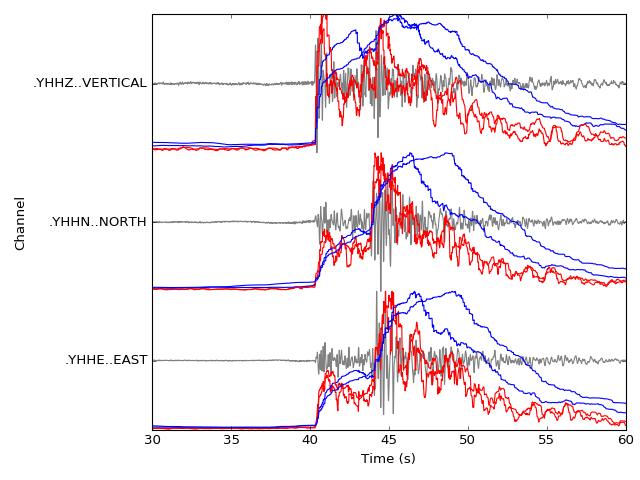

(30, 60)

In [151]:
# getting charactristic functions
cf6 = trigger.Correlate(data=a, multiplexor = 'stlt', preprocessor='rms')
cf7 = trigger.Correlate(data=a, multiplexor = 'comp', preprocessor='rms')

# plotting multiplexor outputs
ax = cf6.shortlongterms.plot()
#ax = cf7.components.plot()
ax.set_xlim([30,60])

<IPython.core.display.Javascript object>


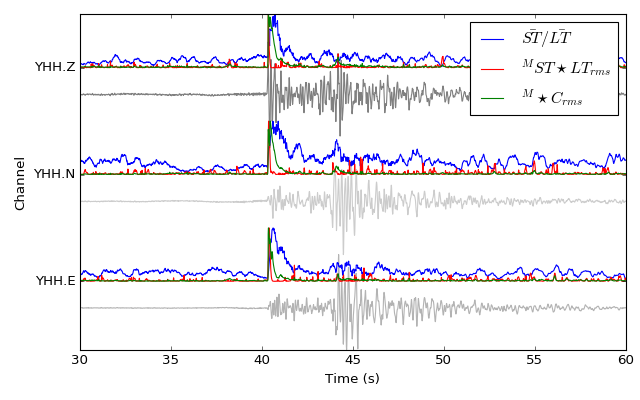

(30, 60)

In [152]:
# plotting results
ax, shift = cf0.plot(cfcolor='b', label=r'$\bar{ST}/\bar{LT}$')
ax, shift = cf6.plot(cfcolor='r', label=r'$^MST\star LT_{rms}$', ax=ax, f="nodata")
ax, shift = cf7.plot(cfcolor='g', label=r'$^M\star C_{rms}$', ax=ax, f="nodata")
ax.set_xlim([30,60])

- **+** $\star C_{rms}$ has more precise peaks,
- **~+** $\star C_{rms}$ has slightly better signal to noise ratio.

# Better wavelet extraction
For the best methods, the onset of peaks is the best estimate of the arrival time.  

**Maximum probability (existing)**

<IPython.core.display.Javascript object>


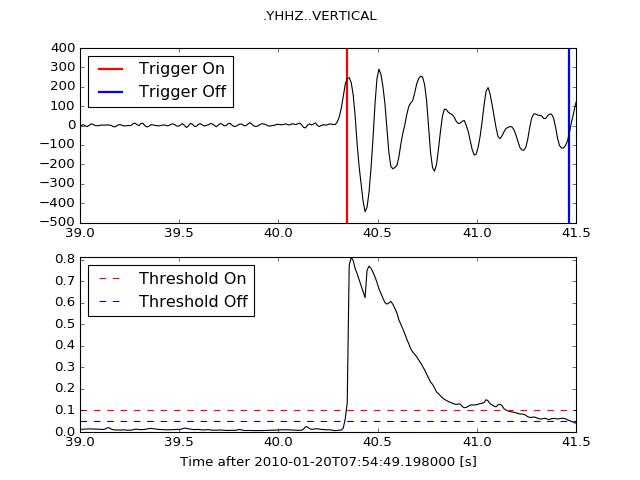

(39, 41.5)

In [153]:
ax = trigger.plot_trigger(onset_refine=False, show=True, charfct=cf7.output()[2,:], thr_on=.1, trace=a[2], max_len_delete=True)
ax.set_xlim([39,41.5])

- Wrong arrival time,
- the off-threshold is a proxy of signal duration but hardly usable.

**Onset of local maximum**

<IPython.core.display.Javascript object>


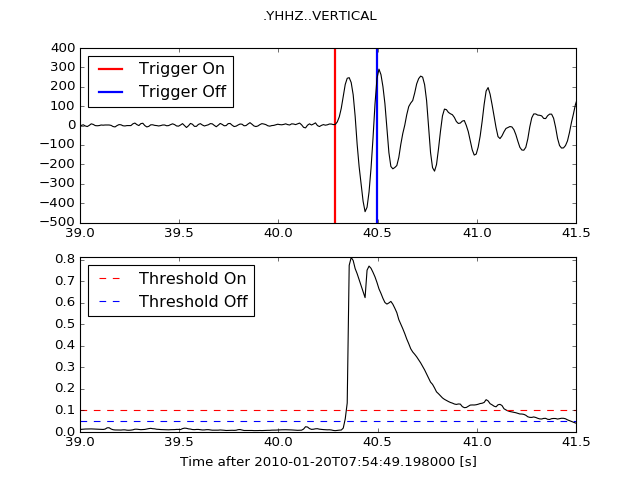

(39, 41.5)

In [154]:
ax = trigger.plot_trigger(onset_refine=True, show=True, charfct=cf7.output()[2,:], thr_on=.1, trace=a[2], max_len_delete=True)
ax.set_xlim([39,41.5])

- Correct arrival time.
- A correlation between the first motion period and the onset delay ?

# Double couple analysis
## Polarity grid
